In [1]:
import wildqat as wq
import numpy as np
import os
aaa = wq.opt()

In [58]:
#座標
positions = np.array((
    (24050.0000, 123783),
    (24216.6667, 123933),
    (24233.3333, 123950),
    (24233.3333, 124016),
    (24250.0000, 123866),
    (24300.0000, 123683),
    (24316.6667, 123900),
    (24316.6667, 124083),
    (24333.3333, 123733),
))
positions = np.array((
    (3, 0),
    (3, 2),
    (0, 2),
    (0, 0),
))
#距離の計算
def dist(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.sqrt(((a - b)**2).sum())
#町の数
N = len(positions)
#定数A
A = 1

In [97]:
#行列Dを計算
D = np.empty((N, N), dtype = np.float64)
for i in range(N):
    for j in range(N):
        D[i, j] = dist(positions[i], positions[j])
#クロネッカーデルタを定義
def delta(i, j):
    if(i == j):
        return 1
    else:
        return 0
def gamma(i, j):
    if(i != j):
        return 1
    else:
        return 0

#行列Jを計算
J = np.empty((N, N, N, N), dtype = np.float64)
for a in range(N):
    for t1 in range(N):
        for b in range(N):
            for t2 in range(N):
                J[a, t1, b, t2] =   A * delta(t1, t2) + A * delta(a, b)\
                                - 2* A * delta(a, b) * delta(t1, t2) - 2 * A * delta(a, b) * delta(t1, t2)
#定数項の計算
C = 2 * A * N

In [92]:
#Qの計算
Q = np.zeros((N*N,N*N), dtype = np.float64)
x = 0
for a in range(N):
    for t1 in range(N):
        y = 0
        for b in range(N):
            for t2 in range(N):
                if x<=y:
                    Q[x,y] += J[a,t1,b,t2]
                else:
                    Q[y,x] += J[a,t1,b,t2]
                y = y + 1
        x = x + 1
print(Q)

[[-2.  2.  2.  2.  2.  0.  0.  0.  2.  0.  0.  0.  2.  0.  0.  0.]
 [ 0. -2.  2.  2.  0.  2.  0.  0.  0.  2.  0.  0.  0.  2.  0.  0.]
 [ 0.  0. -2.  2.  0.  0.  2.  0.  0.  0.  2.  0.  0.  0.  2.  0.]
 [ 0.  0.  0. -2.  0.  0.  0.  2.  0.  0.  0.  2.  0.  0.  0.  2.]
 [ 0.  0.  0.  0. -2.  2.  2.  2.  2.  0.  0.  0.  2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -2.  2.  2.  0.  2.  0.  0.  0.  2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -2.  2.  0.  0.  2.  0.  0.  0.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  2.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -2.  2.  2.  2.  2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -2.  2.  2.  0.  2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -2.  2.  0.  0.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -2.  2.  2.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -2.  2.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -2. 

In [93]:
#最適化計算
aaa.qubo=np.array([
  [-2,2,2,2,2,0,0,0,2,0,0,0,2,0,0,0],
  [0,-2,2,2,0,2,0,0,0,2,0,0,0,2,0,0],
  [0,0,-2,2,0,0,2,0,0,0,2,0,0,0,2,0],
  [0,0,0,-2,0,0,0,2,0,0,0,2,0,0,0,2],
  [0,0,0,0,-2,2,2,2,2,0,0,0,2,0,0,0],
  [0,0,0,0,0,-2,2,2,0,2,0,0,0,2,0,0],
  [0,0,0,0,0,0,-2,2,0,0,2,0,0,0,2,0],
  [0,0,0,0,0,0,0,-2,0,0,0,2,0,0,0,2],
  [0,0,0,0,0,0,0,0,-2,2,2,2,2,0,0,0],
  [0,0,0,0,0,0,0,0,0,-2,2,2,0,2,0,0],
  [0,0,0,0,0,0,0,0,0,0,-2,2,0,0,2,0],
  [0,0,0,0,0,0,0,0,0,0,0,-2,0,0,0,2],
  [0,0,0,0,0,0,0,0,0,0,0,0,-2,2,2,2],
  [0,0,0,0,0,0,0,0,0,0,0,0,0,-2,2,2],
  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,2],
  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2],
])
arrangement = aaa.sa()
aaa.qubo = Q
arrangement = aaa.sa()

In [94]:
result = np.empty((N, N), dtype = np.int)
i = 0

for x in range(N):
    for y in range(N):
        if(arrangement[i] == 1):
            result[x, y] = 1
        else:
            result[x, y] = 0
        i += 1
print("Result: \n", result)

Result: 
 [[0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]]


In [82]:
#距離を計算する
length = 0
for t in range(N):
    for a in range(N):
        for b in range(N):
            if(t < N-1):
                if(result[a, t] == 1 and result[b, t+1] == 1):
                    length += D[b,a]
            else:
                for c in range(N):
                    if(result[a, t] == 1 and result[c, 0] == 1 and b==0):
                        length += D[a, c]
print("Length:", length)

Length: 13.21110255092798


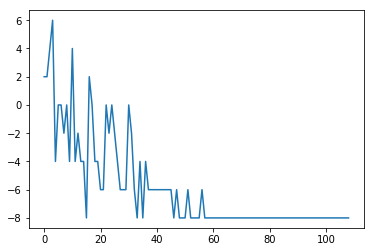

In [95]:
aaa.plot()